In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [101]:
# Load the dataset
data = pd.read_csv("amazon_prime_users.csv")



In [102]:
# Check for missing values
data.isnull().sum().any()



False

In [103]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o

In [104]:
# Convert columns to datetime
date_columns = ['Date of Birth', 'Membership Start Date', 'Membership End Date']
data[date_columns] = data[date_columns].apply(pd.to_datetime)

In [105]:
# Display the first 5 rows of the data set
data.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


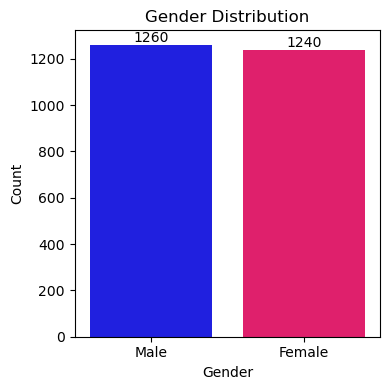

In [106]:
# Create count plot for gender distribution

# Define color palette with pink for females and blue for males
colors = {'Male': 'blue', 'Female': '#FF0066'}

plt.figure(figsize=(4, 4))
ax = sns.countplot(x='Gender', data=data, palette=colors)

# Add count labels above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')


plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()


In [107]:
# Check month distribution for membership starting
data['Month'] = data['Membership Start Date'].dt.month
data['Month_Text'] = data['Membership Start Date'].dt.month_name().str.slice(stop=3)

# Group by `Month` and `Month_Text`, sum it, and sort. Assign result to new DataFrame
data_by_month = data.groupby(['Month', 'Month_Text']).size().reset_index(name='Count').sort_values('Month').head(12)
data_by_month

# April is lower than the rest as the data only goes through 4-13-2024

,Month,Month_Text,Count
0,1,Jan,773
1,2,Feb,651
2,3,Mar,744
3,4,Apr,332


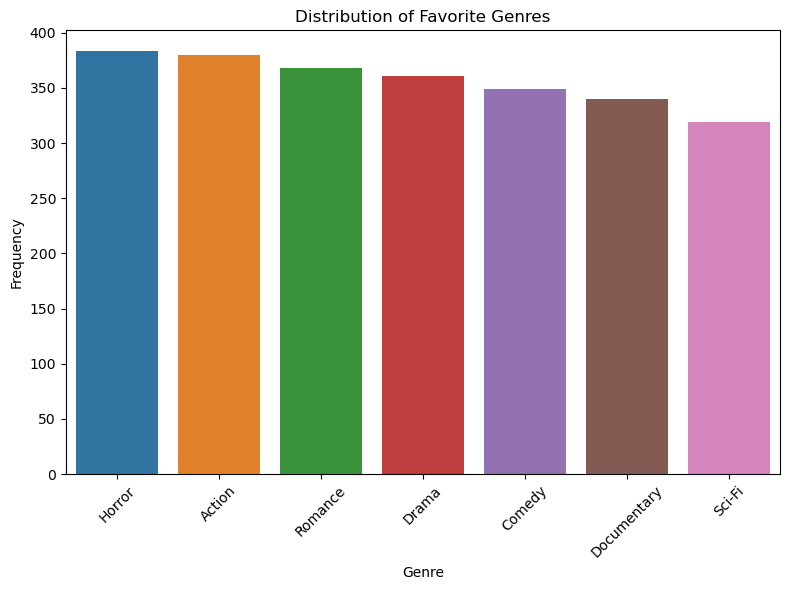

In [109]:
# Count the frequency of each genre
genre_counts = data['Favorite Genres'].value_counts()

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Favorite Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

C:\Users\luke3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


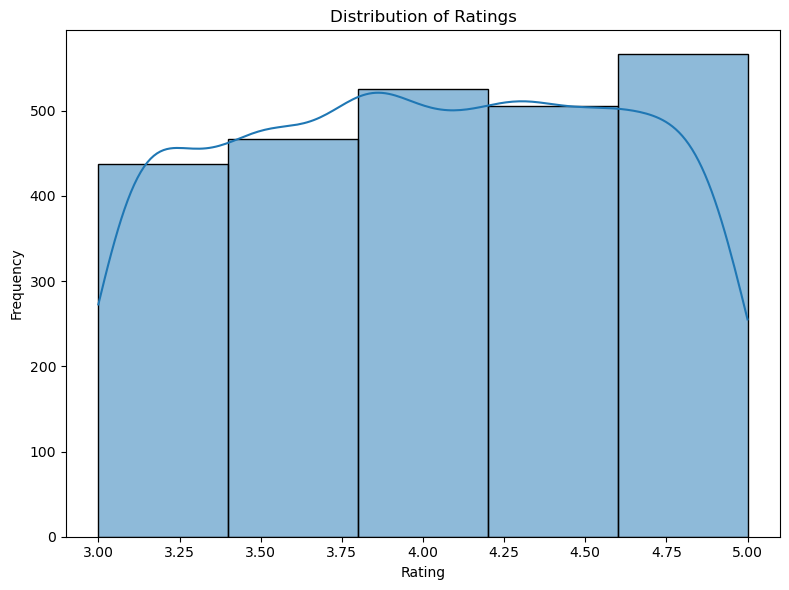

In [110]:
# Create histogram to visualize the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Feedback/Ratings', bins=5, kde=True)  # Adjust number of bins as needed
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\luke3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


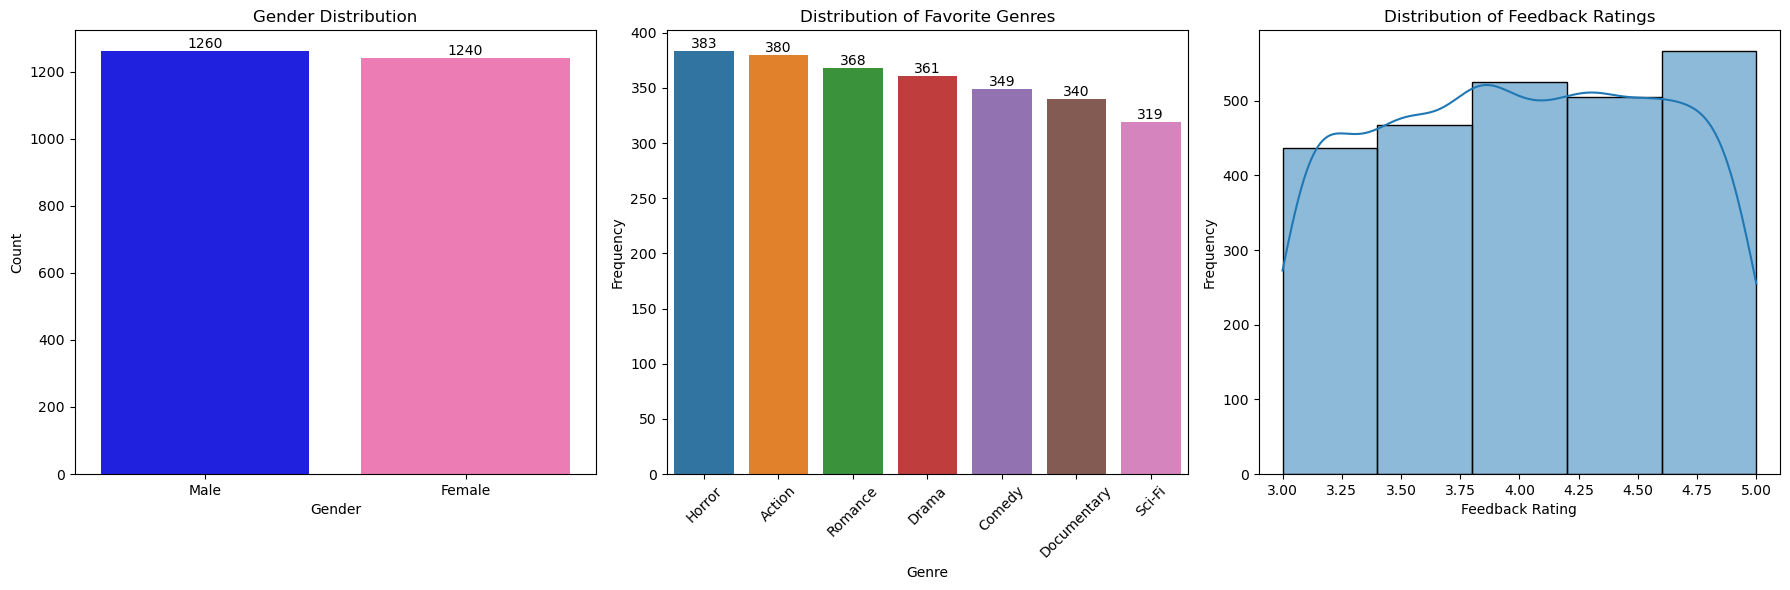

In [118]:
# Create subplots for the three plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: Bar plot of Gender Distribution
gender_counts = data['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[0], palette=['blue', 'hotpink'])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Add counts above the bars
for index, value in enumerate(gender_counts.values):
    axes[0].text(index, value + 0.1, str(value), ha='center', va='bottom')

# Plot 2: Bar plot of Favorite Genres
genre_counts = data['Favorite Genres'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, ax=axes[1])
axes[1].set_title('Distribution of Favorite Genres')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Add counts above the bars
for index, value in enumerate(genre_counts.values):
    axes[1].text(index, value + 0.1, str(value), ha='center', va='bottom')
    
# Plot 3: Histogram of Feedback Ratings
sns.histplot(data=data, x='Feedback/Ratings', bins=5, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Feedback Ratings')
axes[2].set_xlabel('Feedback Rating')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()